# This section presents the implemention and the analysis of the PCA. 


## In the first part:
1. For the PCA, we use Iris dataset. This data set contains the length and width of sepals and petals of three different iris flowers and is a classic example of multivariate data analysis.

2. we loaded the iris dataset and converted it to a DataFrame for easy manipulation. 
3. we also output the header information and statistical summary of the data to provide a basic understanding of the data set.

In [48]:
# Import necessary libraries for data handling and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['Species'] = iris.target

# Show the first few rows of the dataset to understand its structure
print(data.head())

# Show statistical summary of the dataset
print(data.describe())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Species  
0        0  
1        0  
2        0  
3        0  
4        0  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.35

## In the second part:

1. we first normalize the data using StandardScaler to ensure that each feature contributes equally to PCA. 
2. 2e then applied PCA to reduce the data to two principal components for easier visualization and further analysis.


In [49]:
# Import PCA
from sklearn.decomposition import PCA

# Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.iloc[:, :-1])  # Exclude the species label for scaling

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
principal_components = pca.fit_transform(data_scaled)

# Create a new DataFrame with the principal components
pc_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])
pc_df['Species'] = iris.target

# Display the new DataFrame with principal components
print(pc_df.head())

        PC1       PC2  Species
0 -2.264703  0.480027        0
1 -2.080961 -0.674134        0
2 -2.364229 -0.341908        0
3 -2.299384 -0.597395        0
4 -2.389842  0.646835        0


## In the third part:

1. we draw a scatter plot of the iris data set based on the two principal components after dimensionality reduction. Each iris type is marked with a different color so that the separation between the different types can be clearly seen.

2. The PCA not only reduces the dimensionality of the data, but also helps us visualize and understand the main variability in the data.

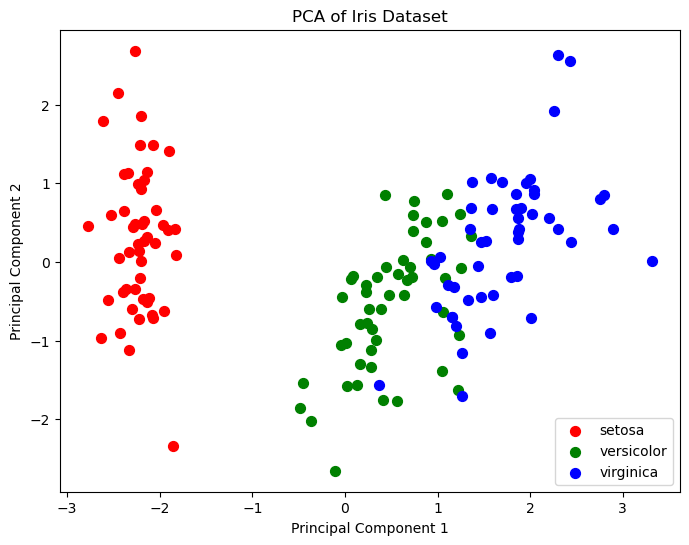

In [50]:
# Plot the PCA-transformed version of the Iris dataset
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
for species, color in zip(data['Species'].unique(), colors):
    indicesToKeep = pc_df['Species'] == species
    plt.scatter(pc_df.loc[indicesToKeep, 'PC1']
               , pc_df.loc[indicesToKeep, 'PC2'], c=color, s=50)
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(iris.target_names)
plt.show()
